# KPrototypes(k=11) Results

From the previous notebook, we have identified that `k=4` is the optimum number of clusters.  
However, will KPrototypes make greater use of categorical features if we increase the number of clusters?

**Setting up**

In [1]:
%load_ext kedro.ipython
%load_ext autoreload
%matplotlib inline
%autoreload 2

[04/19/23 01:49:25] INFO     Resolved project path as: /home/eckt/Documents/usg.                    ]8;id=775659;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=855288;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py#134\134]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

[04/19/23 01:49:26] INFO     Kedro project usg                                                      ]8;id=559043;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=996590;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py#103\103]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=677582;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=143031;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py#104\104]8;;\
                             'pipelines'                                                                           

[04/19/23 01:49:28] INFO     Registered line magic 'run_viz'                                        ]8;id=220900;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=957442;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py#110\110]8;;\

In [2]:
import pandas as pd
import polars as pl
import numpy as np

from matplotlib import rc_context
import matplotlib.pyplot as plt
import seaborn as sb
from seaborn.objects import Plot
import seaborn.objects as so

from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.decomposition import PCA

import logging

from usg.utils import *

log = logging.getLogger(__name__)
log.setLevel(logging.INFO)
sb.set()

In [3]:
k = 11
kaggle_steam: pd.DataFrame = catalog.load('kaggle_steam').set_index('appid')
X: pd.DataFrame = catalog.load('train').set_index('appid')
sscaler: StandardScaler = catalog.load('model@sscaler')
pscaler: PowerTransformer = catalog.load('model@pscaler')
pca: PCA = catalog.load('model@pca')
model: KPrototypes = catalog.load(f'model@kprototypes@{k}')
clusters: pd.Series = catalog.load(f'labels@kprototypes@{k}')['cluster'].set_axis(X.index)

def unpca(X: pd.DataFrame):
    u = pd.DataFrame(pca.inverse_transform(X[pca.get_feature_names_out()]), columns=pca.feature_names_in_, index=X.index)
    return pd.concat([X.loc[:, categorical], u], axis=1)[columns]

def inverse_transform(X: pd.DataFrame):
    sdf = pd.DataFrame(sscaler.inverse_transform(X[sscaler.feature_names_in_]), columns=sscaler.feature_names_in_, index=X.index)
    pdf = pd.DataFrame(pscaler.inverse_transform(X[pscaler.feature_names_in_]), columns=pscaler.feature_names_in_, index=X.index)
    X = pd.concat([X.loc[:, categorical], sdf, pdf], axis=1)[columns]
    X['est_owners'] = 10 ** X['est_owners']
    return X

X = unpca(X)
kaggle_steam['cluster'] = X['cluster'] = clusters

                    INFO     Loading data from 'kaggle_steam' (CSVDataSet)...                   ]8;id=156878;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=873310;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py#343\343]8;;\

[04/19/23 01:49:29] INFO     Loading data from 'train' (CSVDataSet)...                          ]8;id=101276;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=774027;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py#343\343]8;;\

                    INFO     Loading data from 'model@sscaler' (PickleDataSet)...               ]8;id=365814;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=30;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py#343\343]8;;\

                    INFO     Loading data from 'model@pscaler' (PickleDataSet)...               ]8;id=901046;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=571872;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py#343\343]8;;\

                    INFO     Loading data from 'model@pca' (PickleDataSet)...                   ]8;id=487328;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=915057;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py#343\343]8;;\

                    INFO     Loading data from 'model@kprototypes@11' (PickleDataSet)...        ]8;id=277023;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=364406;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py#343\343]8;;\

                    INFO     Loading data from 'labels@kprototypes@11' (CSVDataSet)...          ]8;id=202388;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=148057;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py#343\343]8;;\

In [4]:
centroids_u = unpca(pd.DataFrame(model.cluster_centroids_, columns=list(pca.get_feature_names_out()) + categorical)) # KPrototypes handles categorical last
centroids = inverse_transform(centroids_u)

In [5]:
def melt_only(X: pd.DataFrame, columns: "list[str]"):
    pred = X['variable'].map(lambda x: x in columns)
    return X[pred]

counts = X['cluster'].value_counts()

viz = centroids_u.reset_index(names='cluster').melt(id_vars='cluster')
viz['categorical'] = viz['variable'].map(lambda x: x in categorical)
centroid_viz_data = (viz
                     .reset_index(names='order')
                     .set_index(['cluster', 'variable'])
                     .join(centroids
                           .reset_index(names='cluster')
                           .melt(id_vars='cluster', value_name='orig')
                           .set_index(['cluster', 'variable'])
                           .round(2)
                     )
                     .reset_index('cluster')
                     .join(X[columns].median()
                           .to_frame('median'),
                           how='left'
                     )
                     .reset_index(names='variable')
                     .set_index('cluster')
                     .sort_values(by='order'))

cluster_viz_data = X.melt(id_vars='cluster')#.set_index('cluster')
cluster_viz_data['categorical'] = cluster_viz_data['variable'].map(lambda x: x in categorical)
cluster_viz_data_numerical = cluster_viz_data[~cluster_viz_data['categorical']]
minmax = X[numerical].describe().loc[['min', '25%', '50%', '75%', 'max'], :].T.reset_index(names='variable').melt(id_vars='variable', var_name='indicators')

def centroid_viz(cluster=0):
    df = centroid_viz_data.loc[cluster].reset_index(drop=True)
    return (Plot(data=df, y="variable", x="value", color="categorical")
    .add(so.Bar(width=0.05, color="lightgrey", alpha=0.6), baseline="median", legend=False)
    .add(so.Dot())
    .add(so.Dot(fill=False), x="median", legend=False)
    .add(so.Text(halign="left", fontsize=8, offset=8, color="black"), text="orig")
    .label(title=f"Visualisation of cluster {cluster} centroid (n={counts[cluster]})")
    #.limit(x=(-0.05,1.2))
    )

def cluster_viz(cluster=0):
    fig, ax = plt.subplots(ncols=2, figsize=(12,6), sharex=True)
    fig.set_tight_layout(True)
    df = cluster_viz_data.set_index('cluster').loc[cluster].reset_index(drop=True)
    df2 = cluster_viz_data_numerical.set_index('cluster').loc[cluster].reset_index(drop=True)
    (sb.boxplot(data=df, 
                x='value', 
                y='variable', 
                ax=ax[0],
                fliersize=2,
                flierprops={"marker": "x"}, 
                showcaps=False)
    .set(title=f"Visualisation of cluster {cluster} (n={counts[cluster]})"))
    (sb.violinplot(data=df2,
                x='value', 
                y='variable', 
                ax=ax[1],
                hue=True,
                hue_order=[True,False],
                color='lightgrey',
                split=True,
                legend=False)
    .set(title=f"Numeric features"))
    (sb.scatterplot(data=minmax,
                    x='value',
                    y='variable',
                    hue='indicators',
                    marker='d',
                    ax=ax[1]))

## At a glance

**Number of games per cluster**

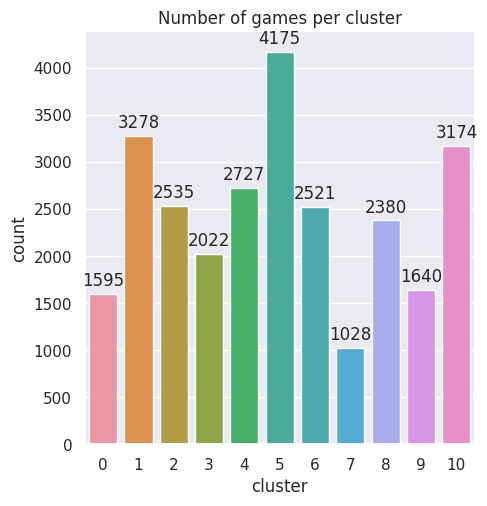

In [6]:
catplot_xlabel(sb.catplot(data=X, x='cluster', kind='count').set(title="Number of games per cluster"))

## Centroids

**Categorical features**

Most of the categorical variables were not used to differentiate clusters.  
Only `Steam Achievements`, `Steam Trading Cards` and `Action` were useful.

**Numeric features**

For numeric features, only `num_genres` was not useful.  
The line `x=0` is important for numeric features as we applied `PowerTransformer` indicating that `0` is the mean of the entire dataset.  

At a glance, we see `cluster 1` and `cluster 2` are generally on the lower end of the plot while `cluster 0` is on the higher end of the plot.

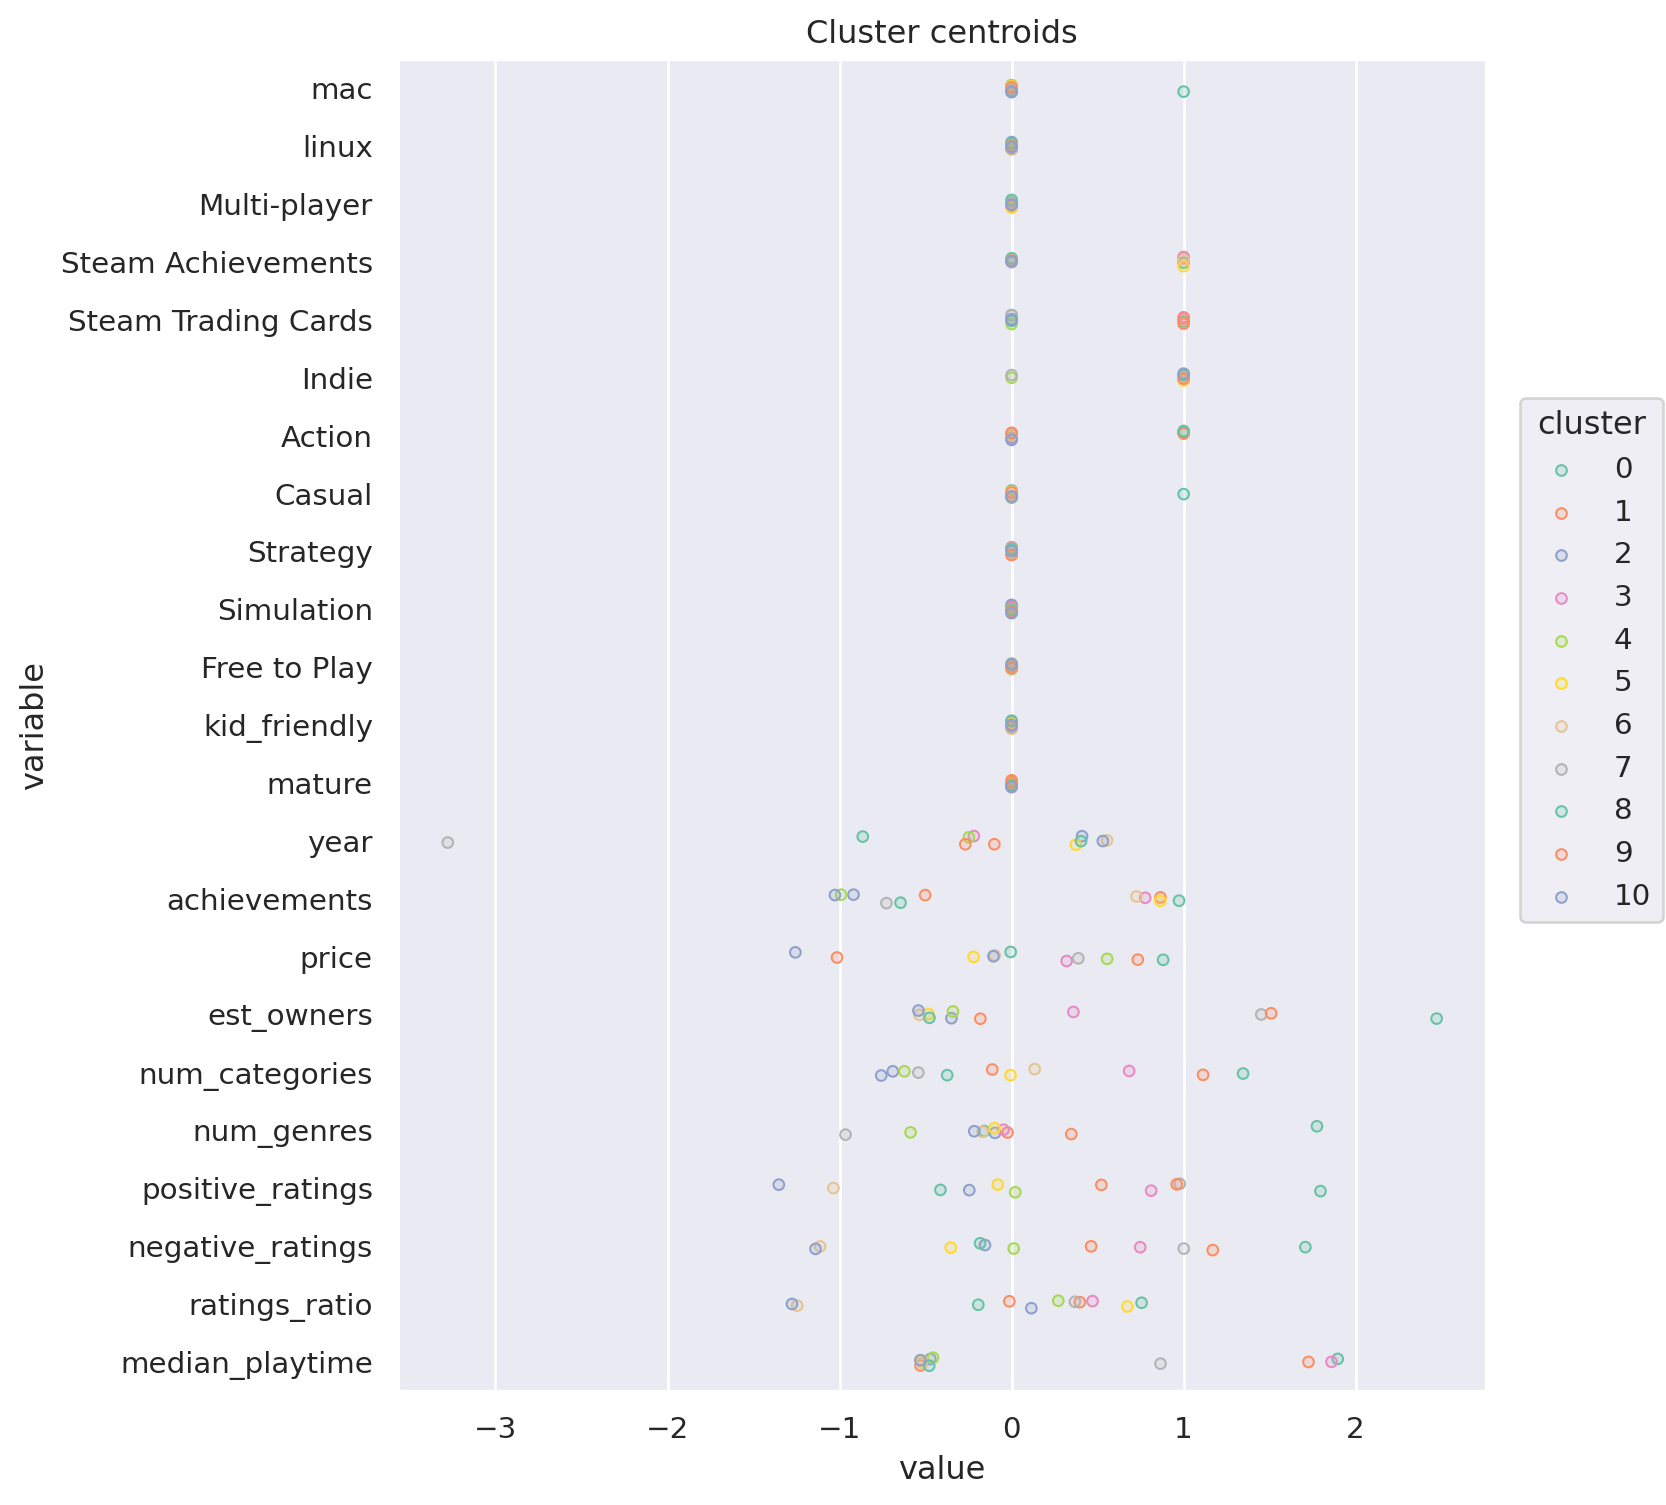

In [7]:
(Plot(data=centroid_viz_data.reset_index(), y="variable", x="value", color="cluster")
 #.limit(x=(-0.05,1.2))
 .layout(size=(8,8))
 .add(so.Dots(), so.Jitter(x=0))
 .label(title='Cluster centroids')
 .scale(color='Set2'))

The following plot shows more conveniently that `cluster 0` is often on the high end while `cluster 1` and `2` are on the low end.

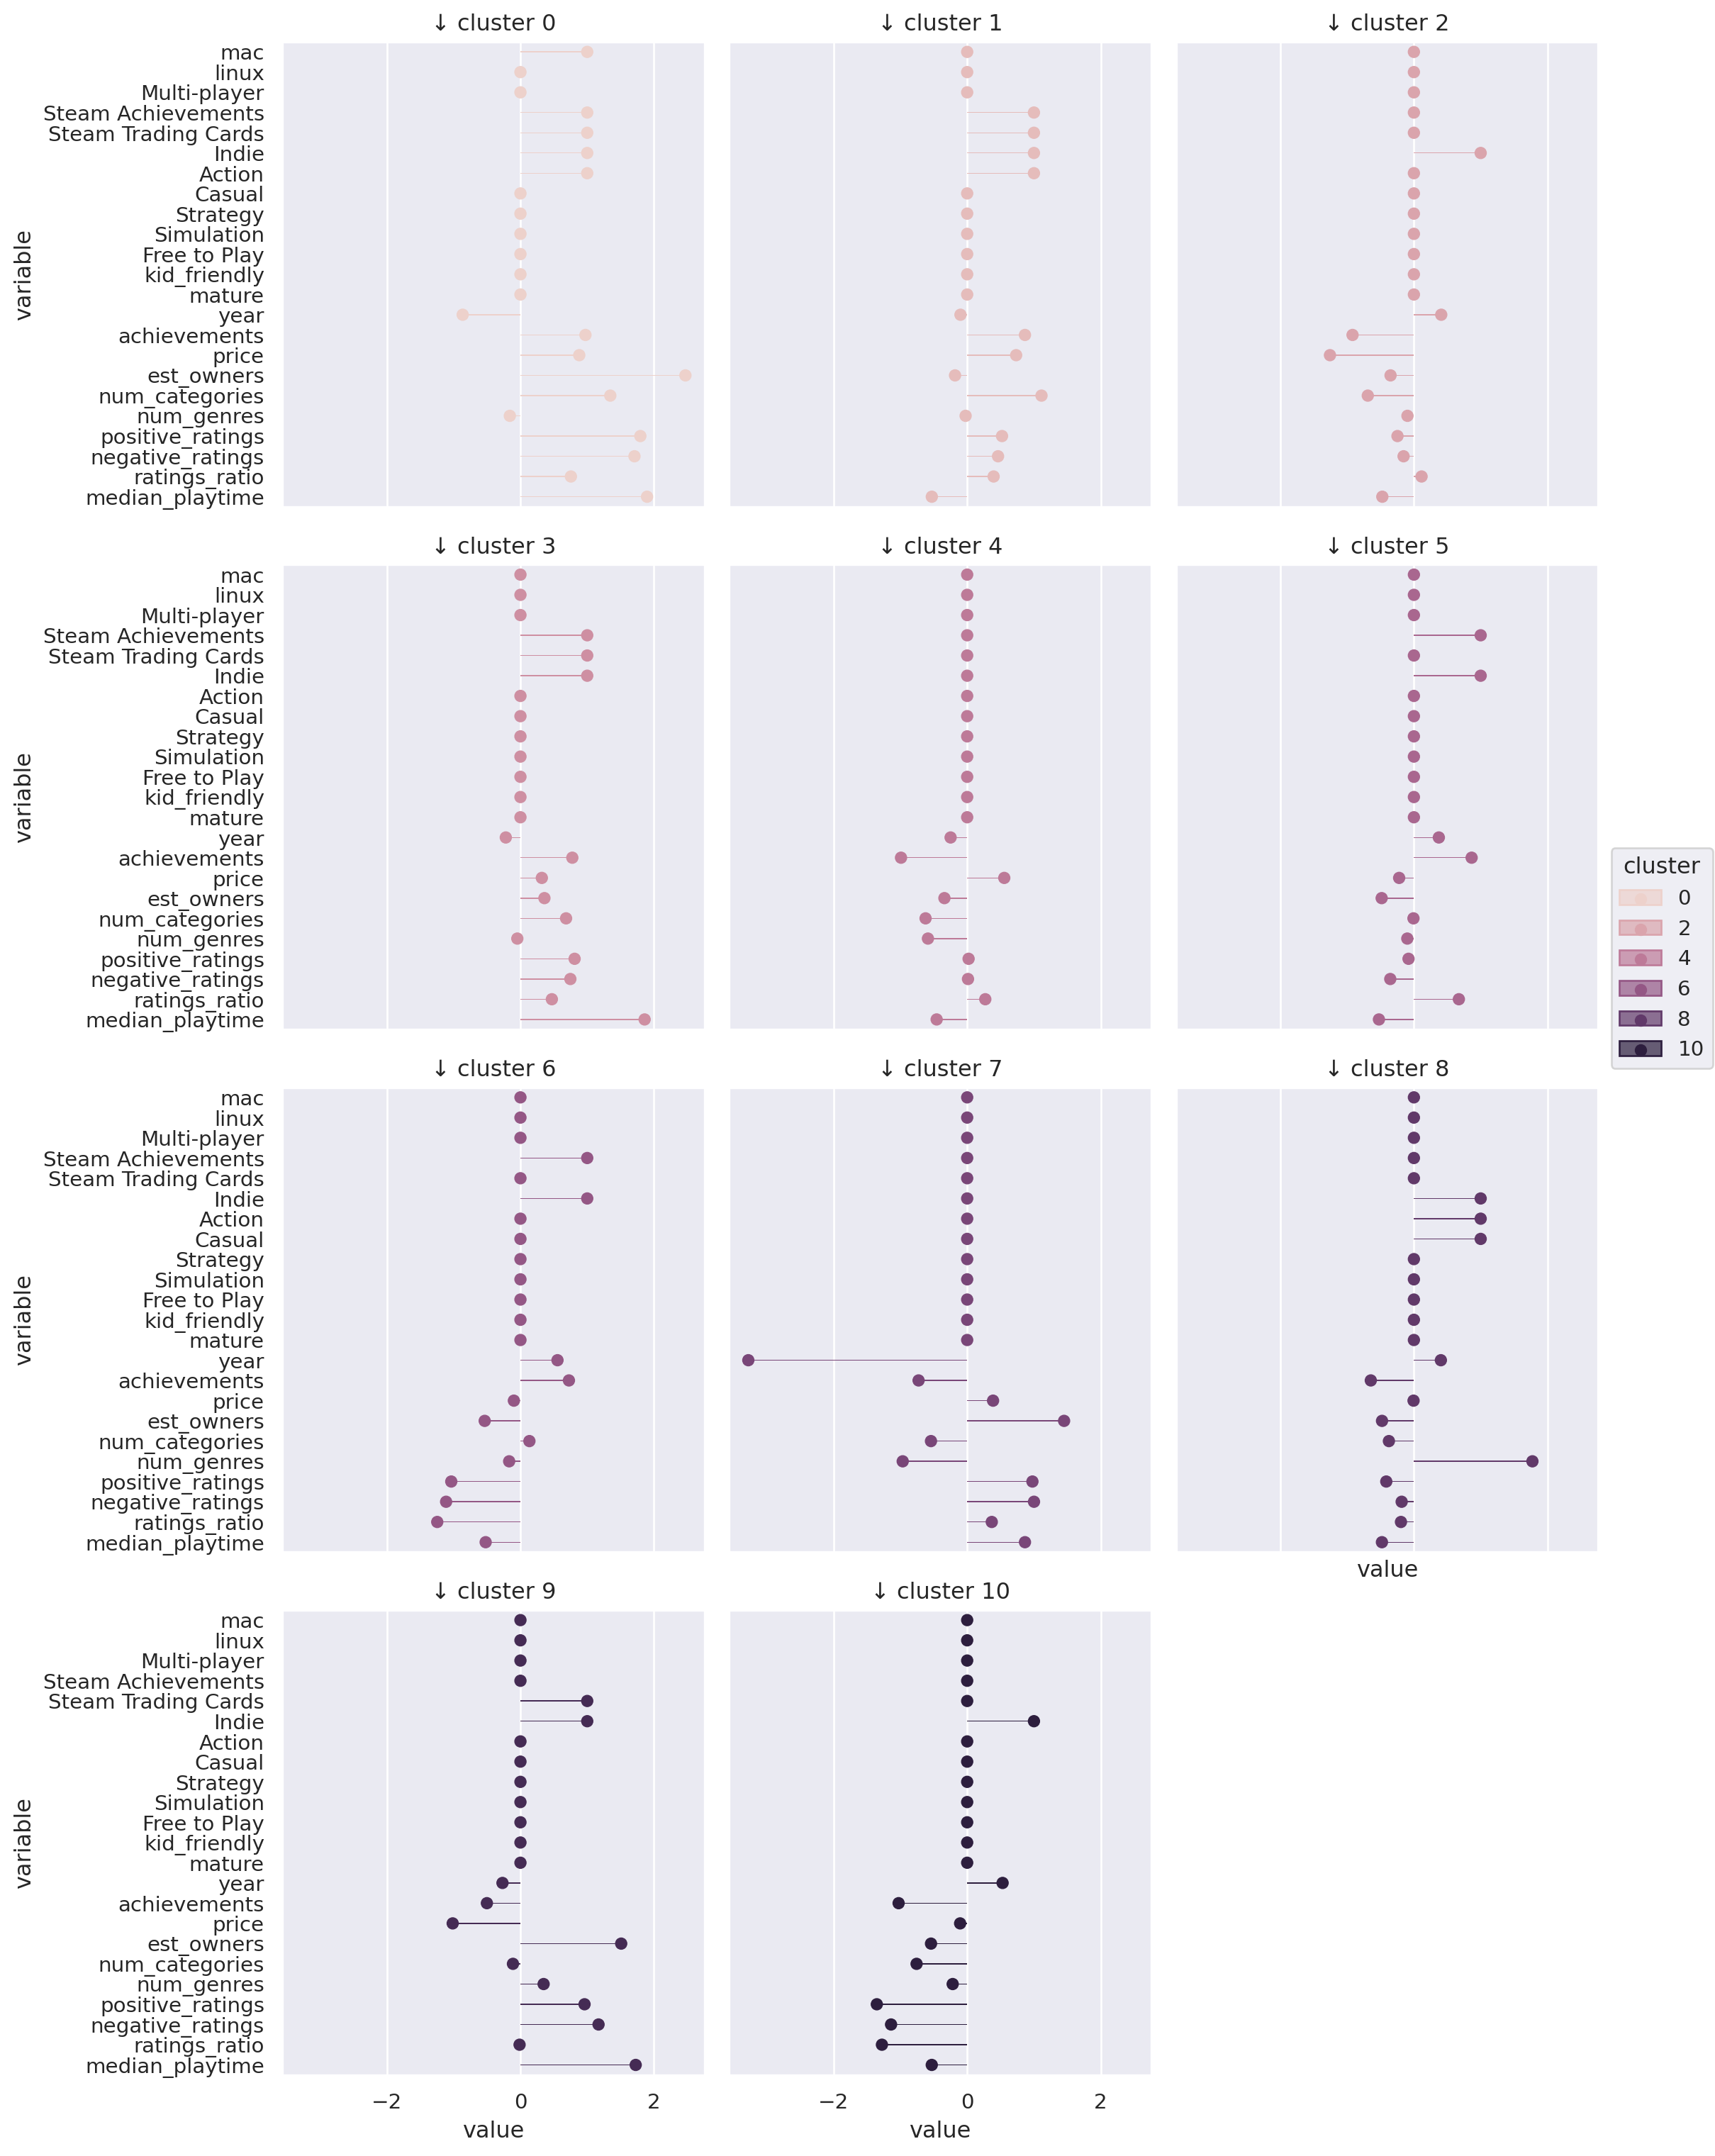

In [26]:
(Plot(data=centroid_viz_data.reset_index(), y="variable", x="value", color="cluster")
 #.limit(x=(-0.05,1.2))
 .layout(size=(12,16))
 .facet(col="cluster", wrap=3)
 .add(so.Bar(width=0.05))
 .add(so.Dot())
 .label(col="↓ cluster"))

# Cluster analysis

## Numeric Features

We can easily see that `Year` has many negative outliers while having 0 positive outliers. This suggests that very old games are not sufficiently distinct enough to form their own cluster.

We see that `est_owners` is very well-defined for clusters 1, 2, and 3, with 25% and 75% quartiles equal to the median. Only cluster 0 distinguishes itself by consisting of games that are more popular. In addition, `median_playtime` follows a similar pattern, with cluster 0 having higher playtimes then the rest.

Both `positive_ratings` and `negative_ratings` prove to be quite correlated as seen in our previous notebook, they tend to follow similar distributions within a cluster.

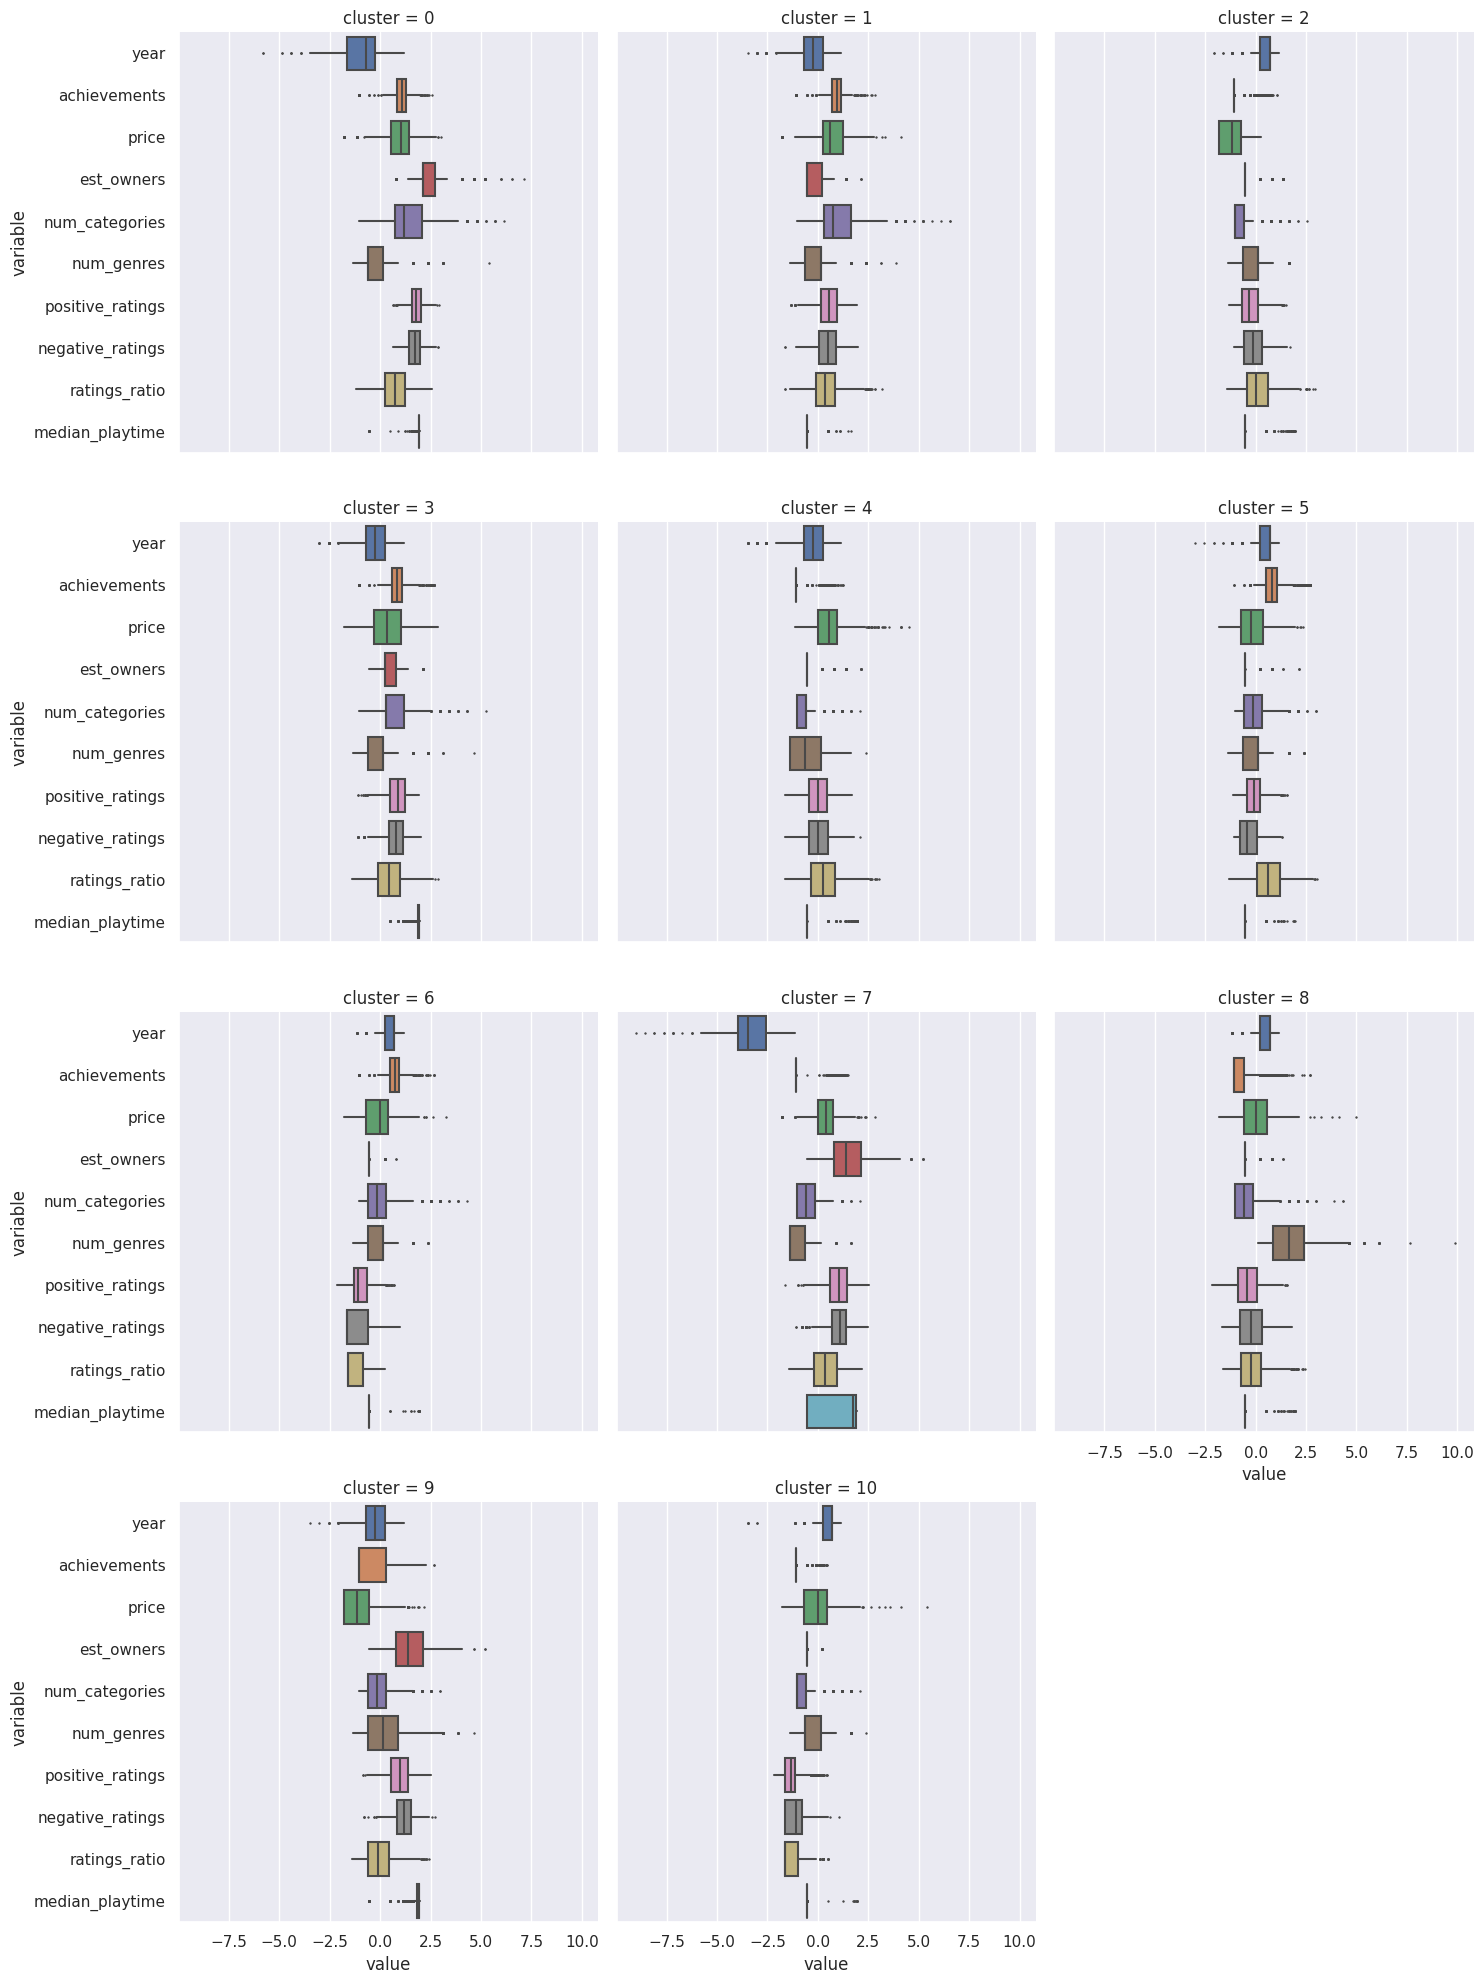

In [27]:
sb.catplot(data=melt_only(cluster_viz_data, numerical), 
           x='value', 
           y='variable', 
           col='cluster', 
           col_wrap=3,
           kind='box', 
           fliersize=2,
           flierprops={"marker": "+"}, 
           showcaps=False)

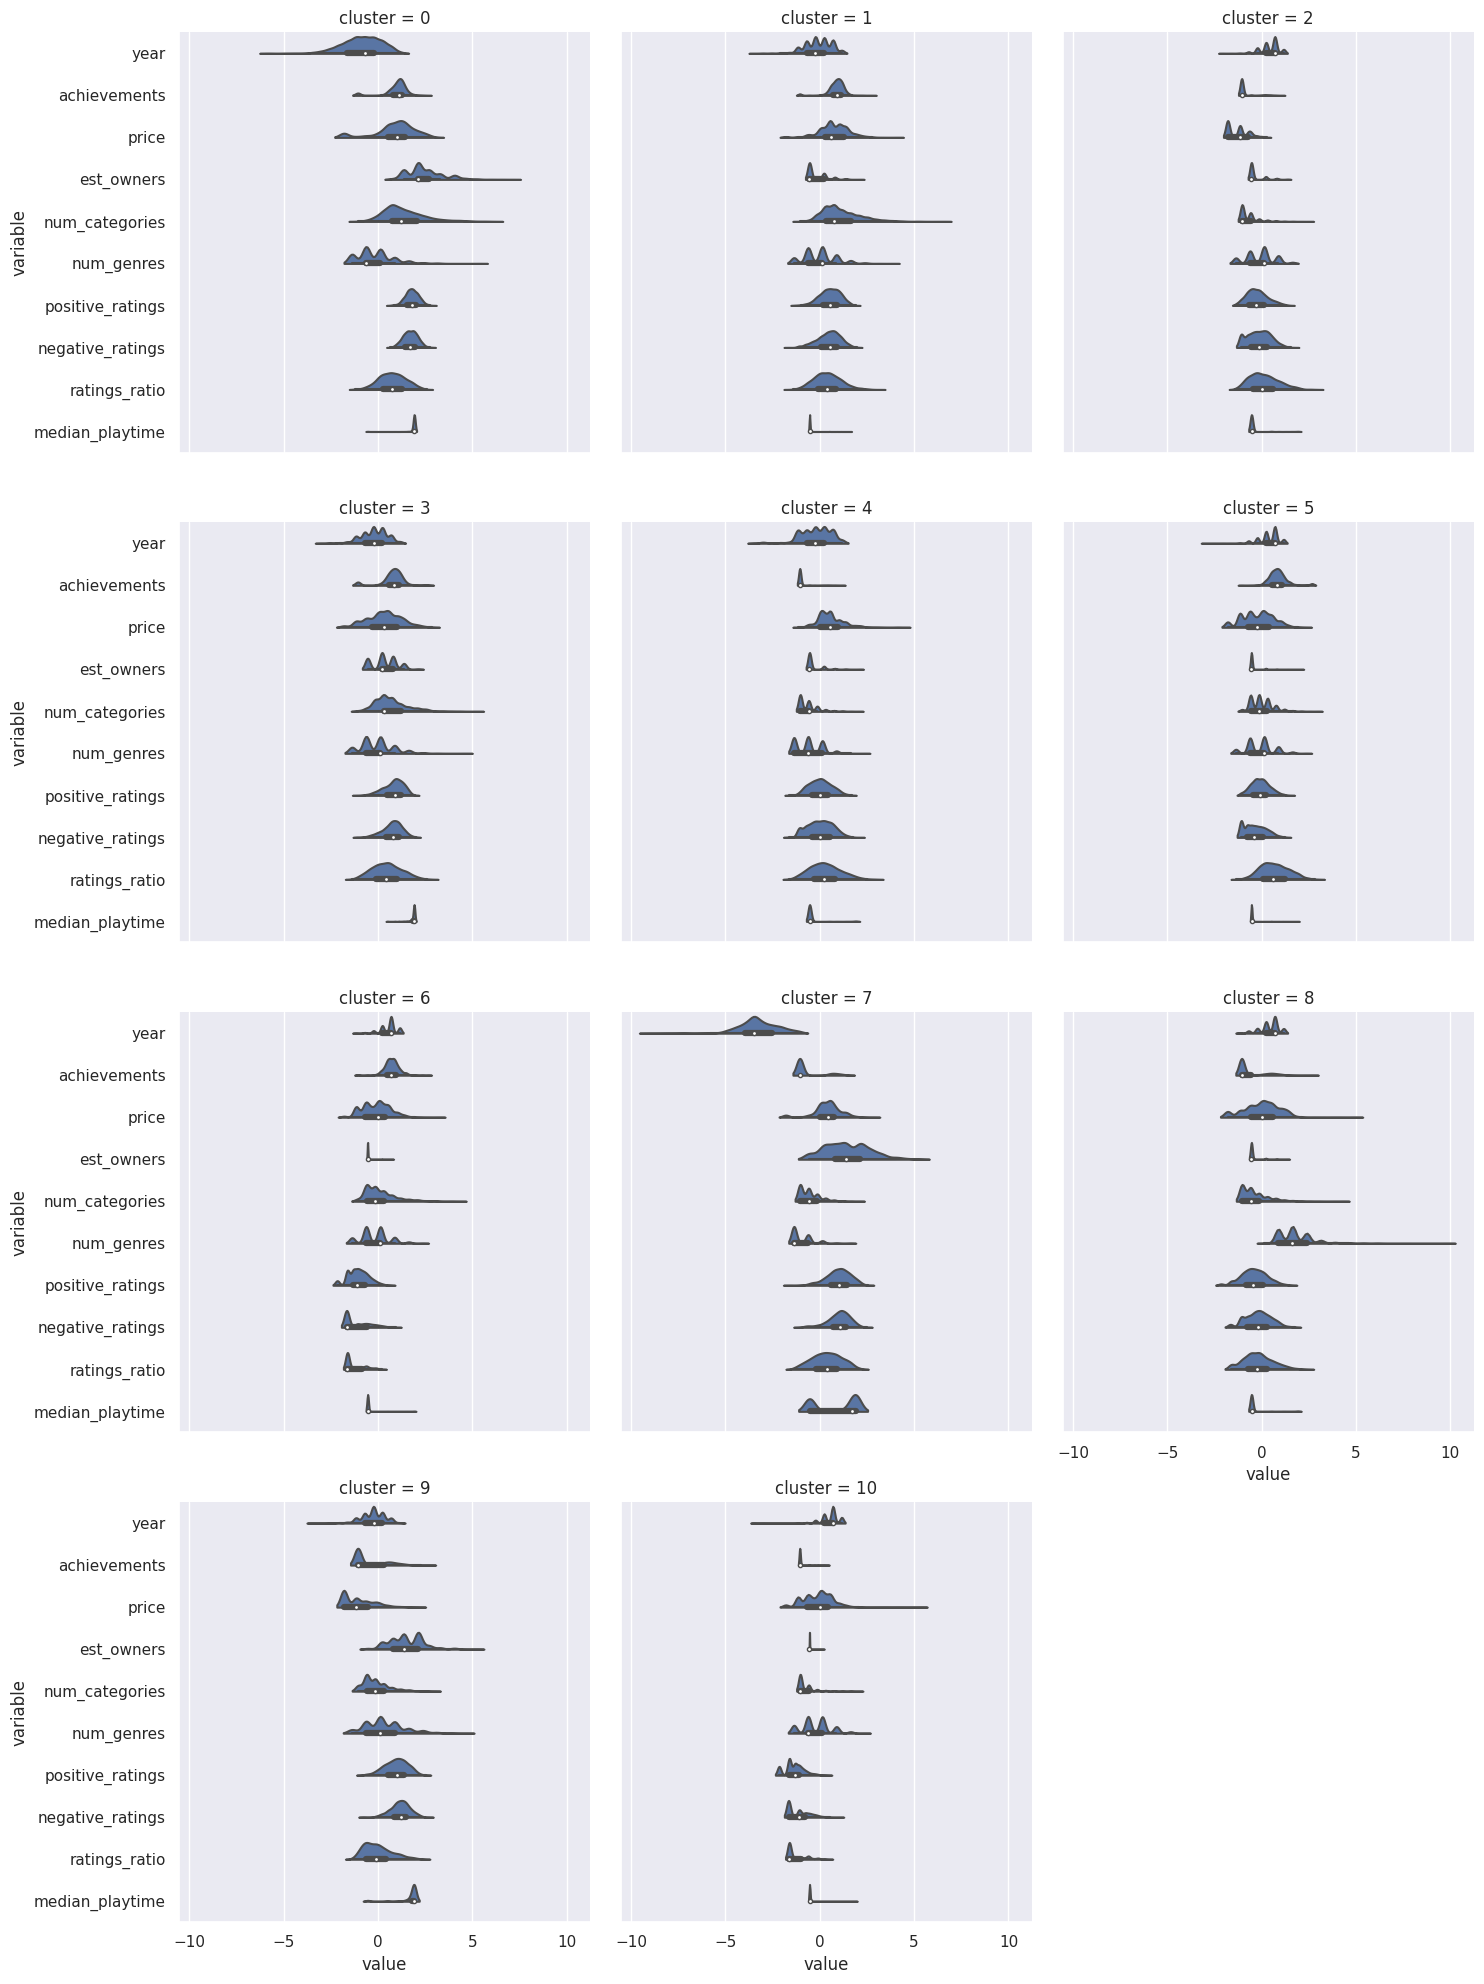

In [28]:
sb.catplot(data=melt_only(cluster_viz_data, numerical), 
           x='value', 
           y='variable', 
           col='cluster', 
           col_wrap=3,
           kind='violin',
           inner='box',
           hue=True,
           hue_order=[True, False],
           split=True,
           legend=False)

## Categorical features

`mac`, `linux`: Cluster 0 and 3 are more cross-platform friendly than 1 and 2.

`Multi-player`: cluster 0 is more likely to contain multiplayer games compared to the other clusters

`Steam Achievements`: cluster 3 is almost guaranteed to have games featuring achievements while cluster 2 is the opposite, most of the games in it do not support achievements.

`Steam Trading Cards`: Cluster 1 is very unlikely to feature games that support `Steam Trading Cards` while cluster 0 contains double the normal proportion of `Steam Trading Cards` across all steam games in general.

`Indie`, `Action`, `Casual`, `Strategy`, `Simulation`: roughly similar across all clusters

`Free to Play`: Cluster 0 and 2 have higher percentage of free to play games in general

`kid_friendly`, `mature`: These games are more likely to be found in cluster 0. (>50%)



*Note that the following graph does not account for the differences in the total size of each cluster. This is corrected in the second graph.*

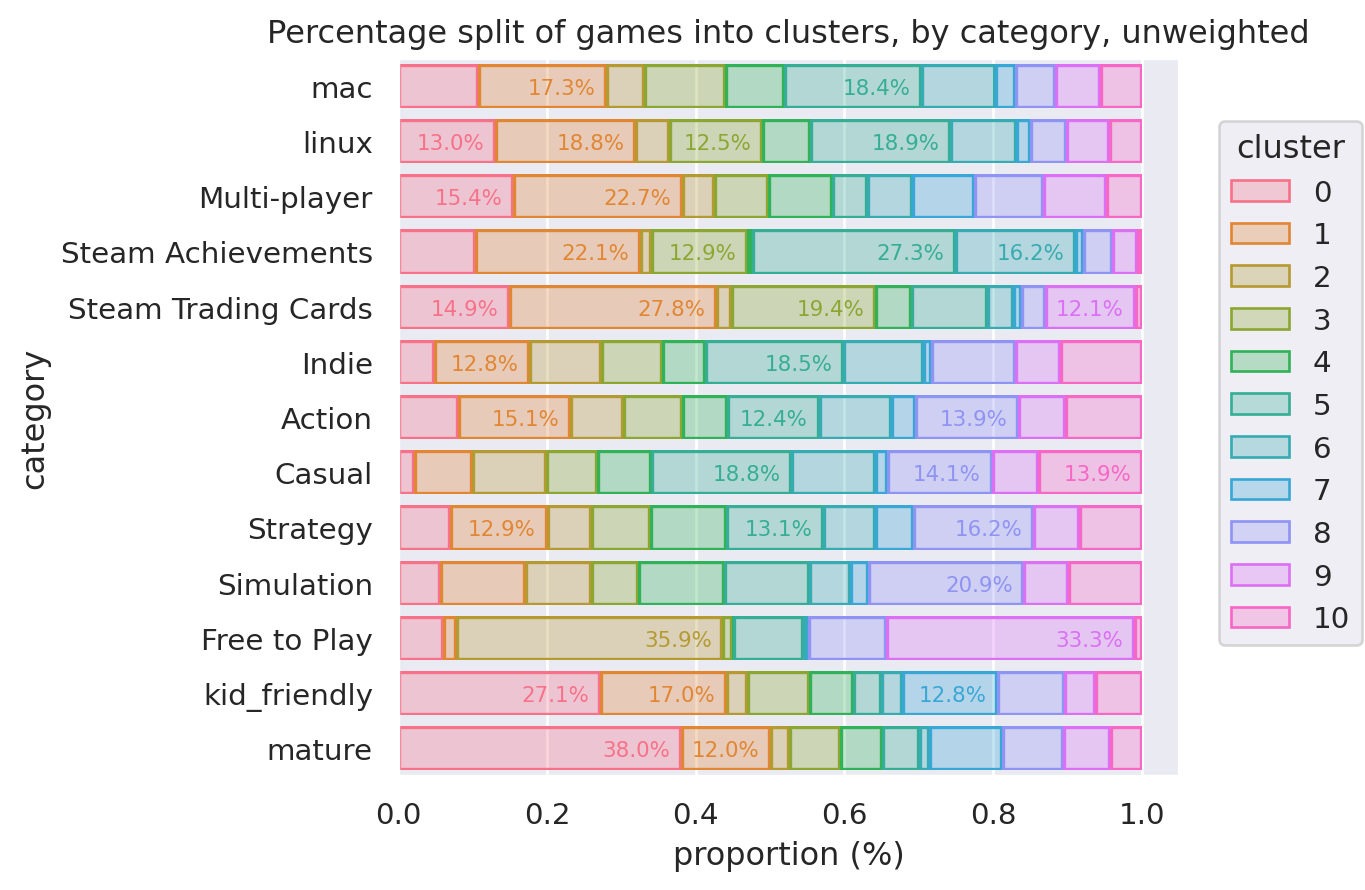

In [11]:
viz = (X.groupby(by='cluster')[categorical].sum() / X[categorical].sum()).T.reset_index(names='category').melt(id_vars='category', var_name='cluster', value_name='proportion (%)')
viz['cluster'] = viz['cluster'].map(str)
viz['text'] = viz['proportion (%)'].map(lambda x: f"{x:.1%}" if x >= 0.12 else "")
(Plot(data=viz, y='category', x='proportion (%)', color='cluster')
 .add(so.Bar(alpha=.3), so.Stack())
 .add(so.Text(halign='right', fontsize=8), so.Stack(),text='text')
 .label(title='Percentage split of games into clusters, by category, unweighted'))

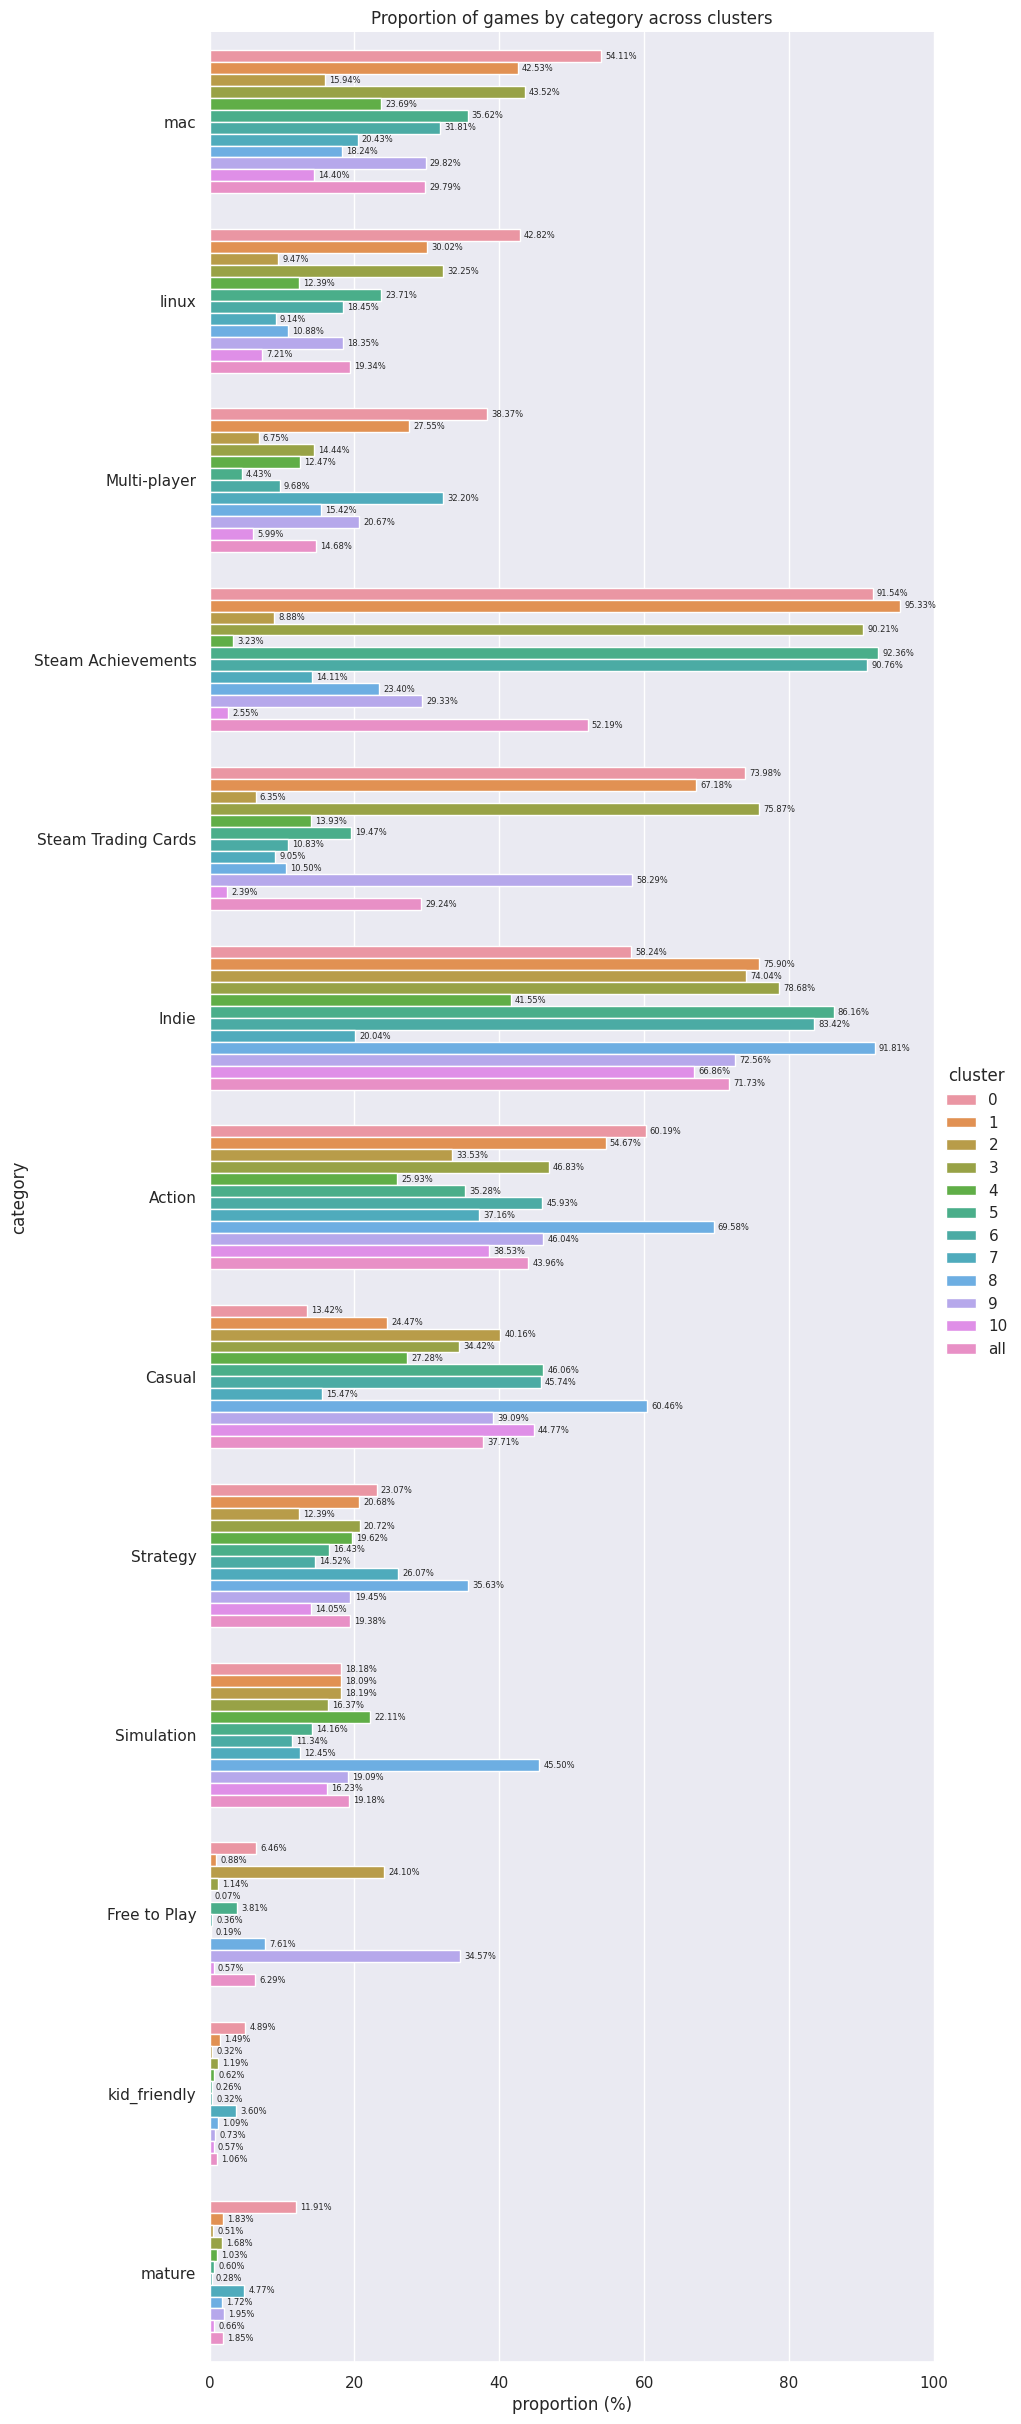

In [32]:
viz = (pd.concat([
    (X.groupby(by='cluster')[categorical].sum() / X.groupby(by='cluster')[categorical].count()).T,
    (X[categorical].sum() / X[categorical].count()).to_frame('all')
], axis=1).round(4) * 100).reset_index(names='category').melt(id_vars='category', var_name='cluster', value_name='proportion (%)')

with rc_context({'font.size': 6}):
    catplot_ylabel(sb.catplot(data=viz, y='category', x='proportion (%)', hue='cluster', kind='bar', aspect=0.4, height=24), fmt='{0:.2f}%').set(title='Proportion of games by category across clusters')

# Cluster 0 - Classic, Timeless Games that have a solid fan base

This cluster likely consists of staple games that have good retention of their player base after many years. We see that these games are older in general but boast extremely high ownership. Due to their popularity and long age, they are likely to attract many reviews, both good and bad, which can explain why this cluster has more reviews than other clusters on average. Furthermore, this cluster has the highest median playtime which shows that players tend to invest more hours into these games compared to other games which can indicate that these games are good value for money per hour of enjoyment and a massive time sink.

In [13]:
kaggle_steam[kaggle_steam['cluster'] == 0].sort_values(by='positive_ratings', ascending=False).head(10)['name']

appid
730       Counter-Strike: Global Offensive
570                                 Dota 2
440                        Team Fortress 2
578080       PLAYERUNKNOWN'S BATTLEGROUNDS
4000                           Garry's Mod
271590                  Grand Theft Auto V
218620                            PAYDAY 2
304930                            Unturned
105600                            Terraria
550                          Left 4 Dead 2
Name: name, dtype: object

In [14]:
kaggle_steam[kaggle_steam['cluster'] == 0].sample(10)['name']

appid
480490                                      Prey
242760                                The Forest
206210        Gotham City Impostors Free to Play
392110                          Endless Space® 2
368730             No Time To Explain Remastered
10500     Total War: EMPIRE – Definitive Edition
285820                               Action Henk
207230                               ArcheBlade™
209000                   Batman™: Arkham Origins
341000                          Mad Games Tycoon
Name: name, dtype: object

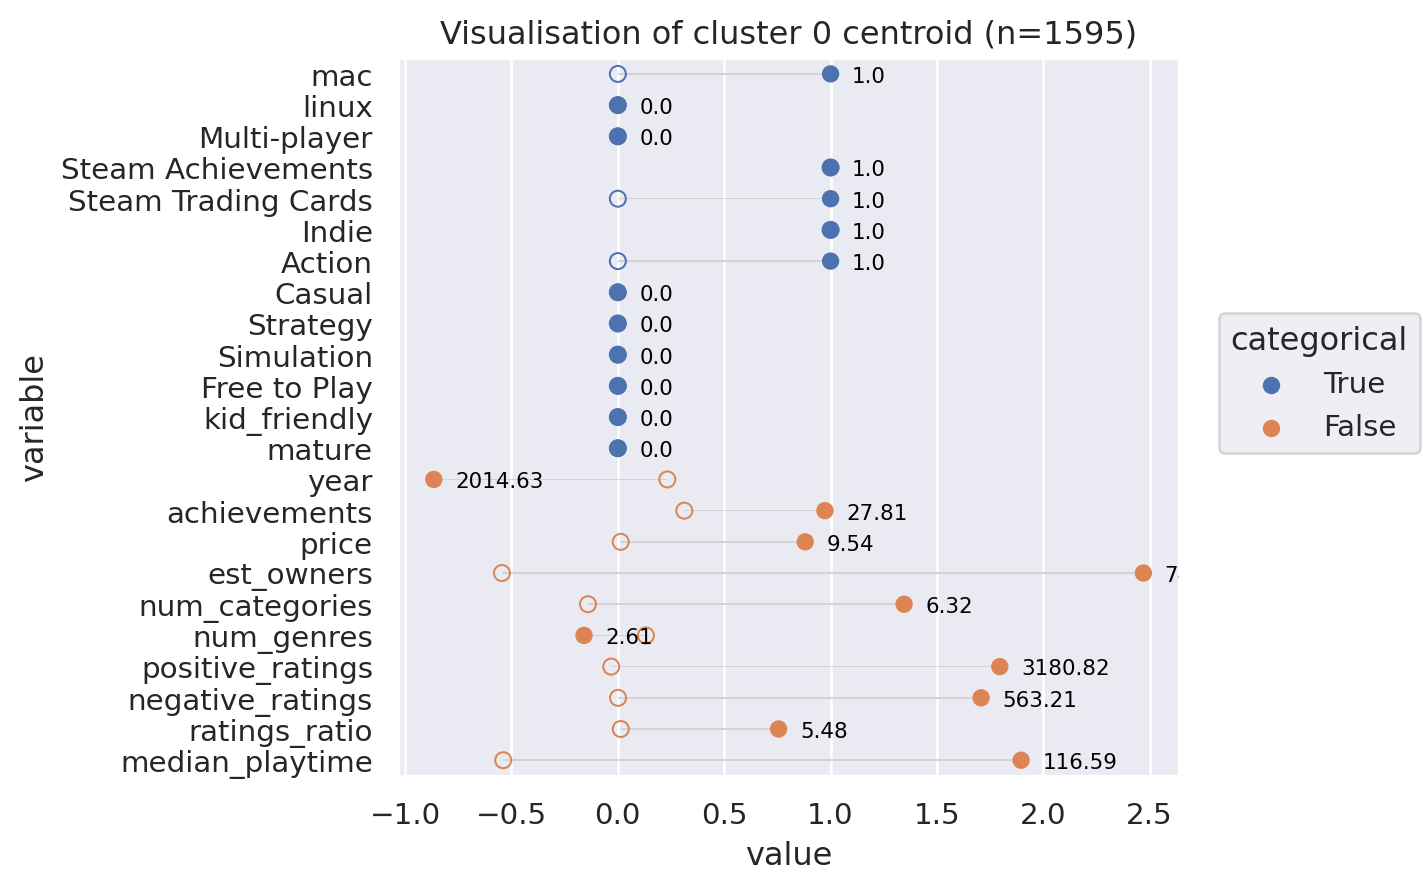

In [15]:
centroid_viz(0)

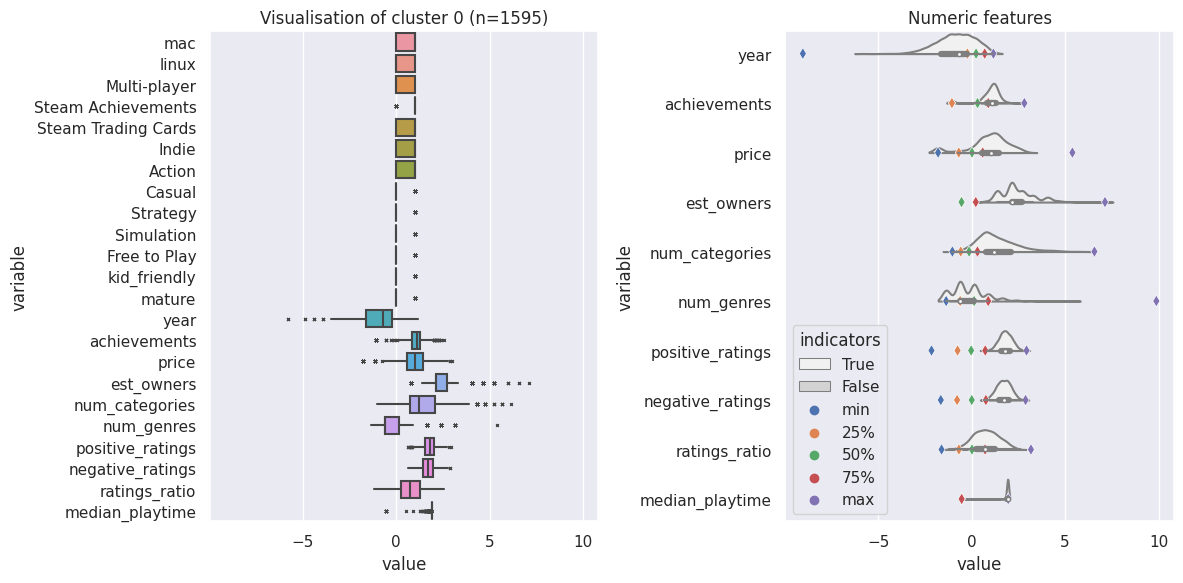

In [16]:
cluster_viz(0)

# Cluster 1

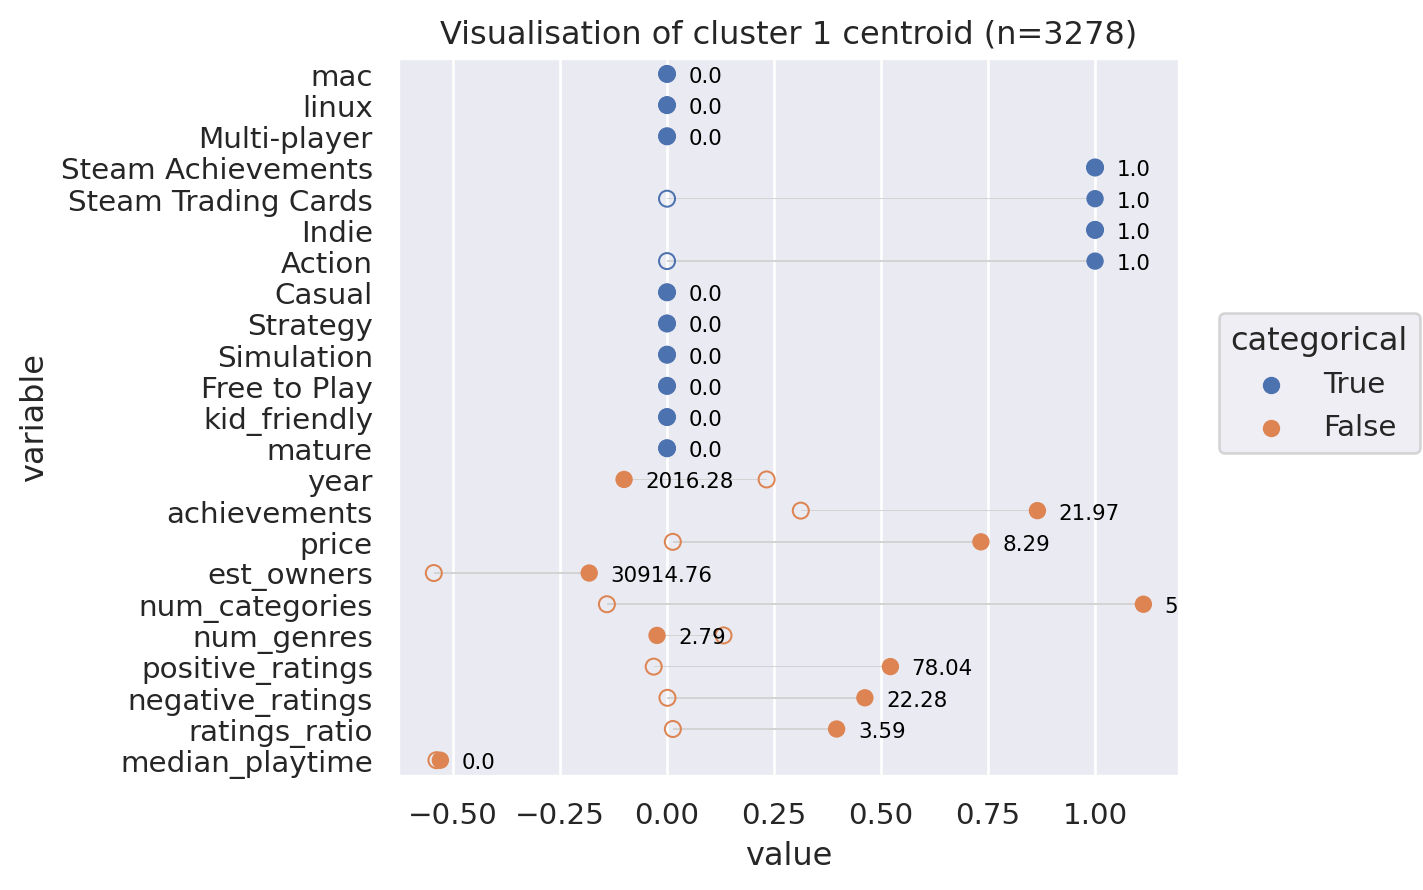

In [17]:
centroid_viz(1)

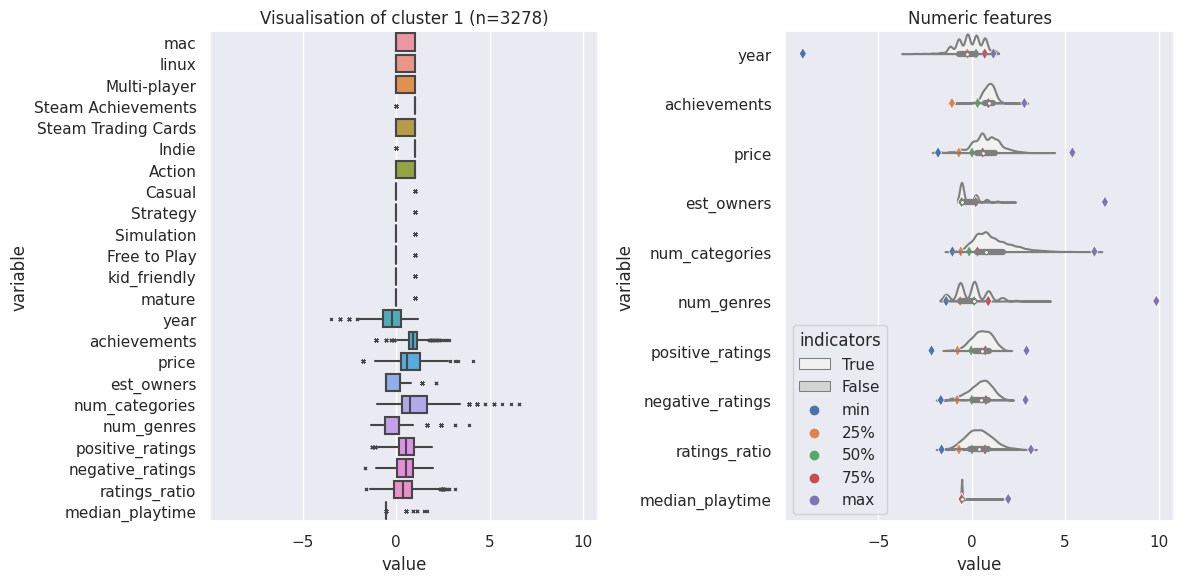

In [18]:
cluster_viz(1)

# Cluster 2

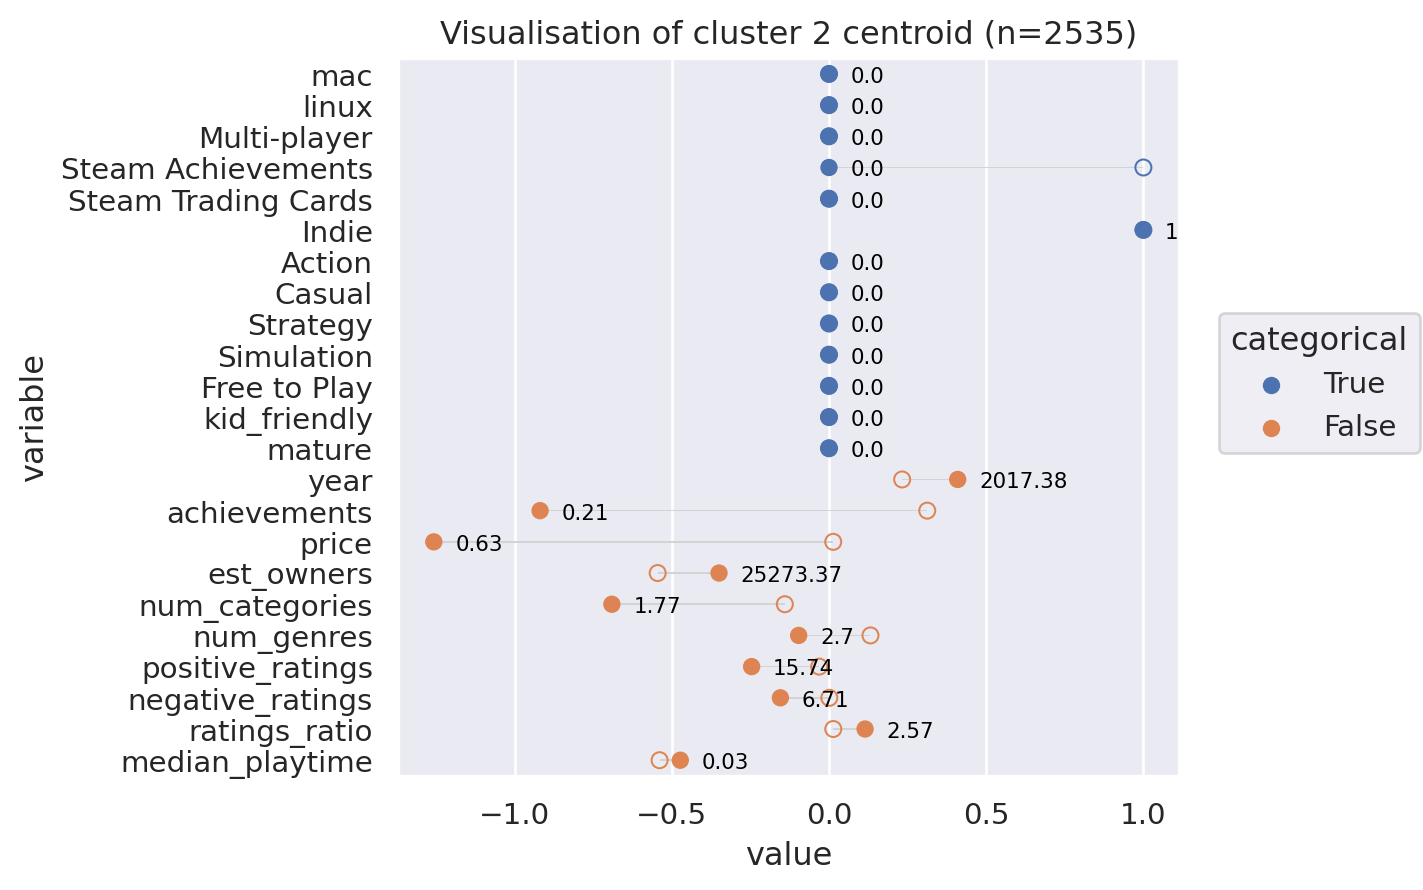

In [19]:
centroid_viz(2)

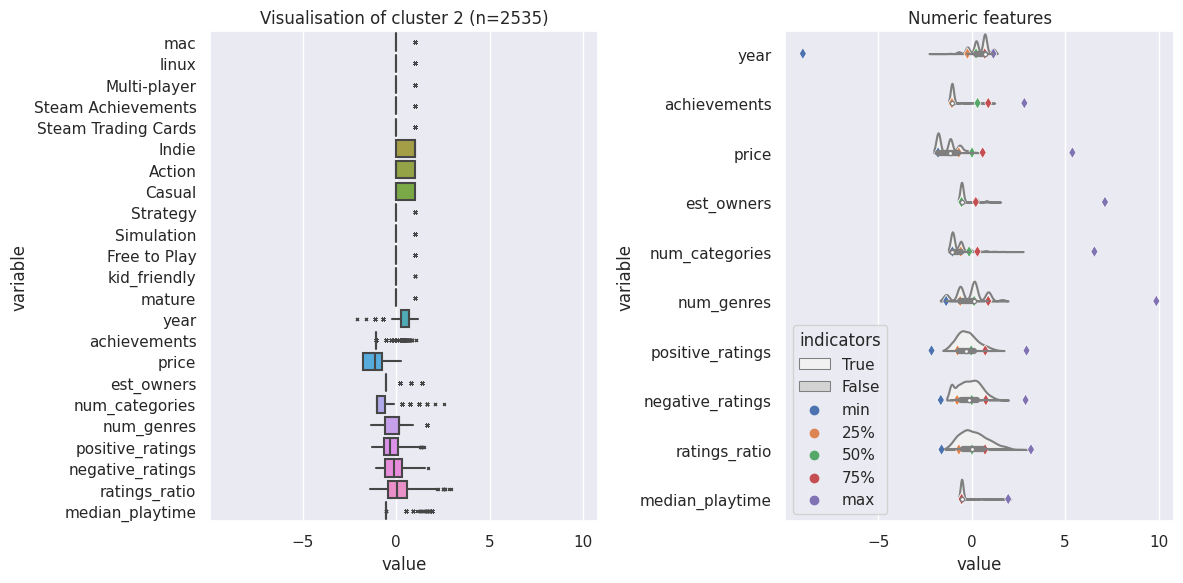

In [20]:
cluster_viz(2)

# Cluster 3

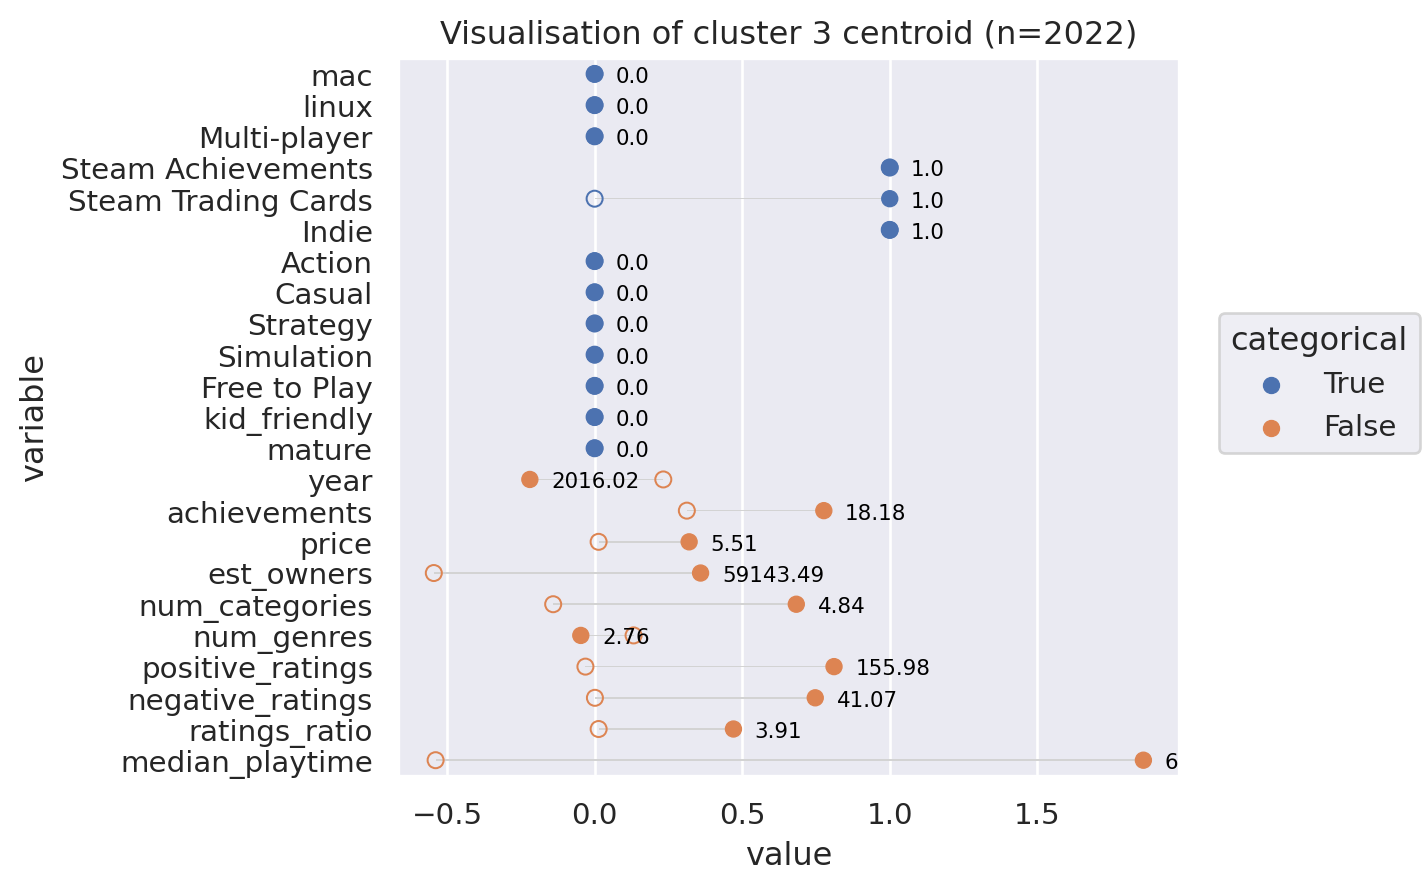

In [21]:
centroid_viz(3)

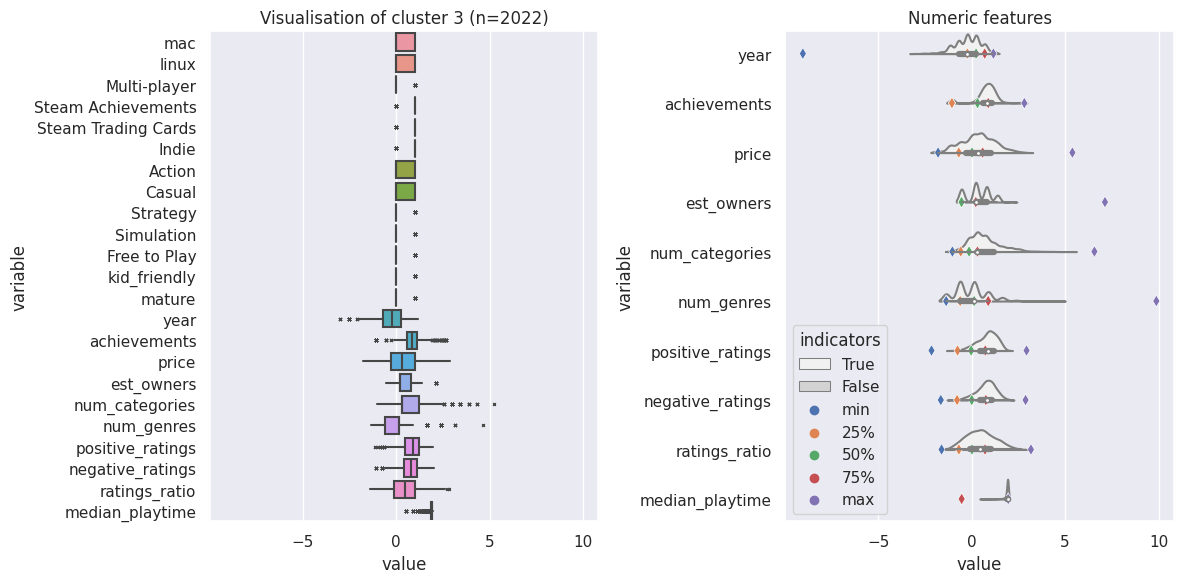

In [22]:
cluster_viz(3)

# Summary

We think that it is not ideal for so much of the data to end up in `cluster 0` as it does not help us carve out meaning from the data. Hence, we skipped analysis for `n=4`